# Consistency Assessment of the Atlas Underpinning Dataset with Original #WIP

**Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.**
Production date: DD-MM-YYYY
Dataset version: 2.0.
Produced by: C3S2_521 contract.

## 🌍 Use case: tbd 

## ❓ Quality assessment question
* **Are the output indexes consistent between the Gridded Dataset Underpinning the Copernicus Interactive Climate Atlas and the CMIP6 Climate Projections dataset?**
* **etc**

This box will be the introduction to the assessment, including:
- Purpose and aims of the assessment. 
- 

(NOTE: need to find the correct terminology when referring to the non-Atlas datasets throughout this, option: original origin datasets, non-Atlas datasets, ...  have chosen origin datasets)

The purpose of this assessment is to evaluate the consistency between the Gridded Dataset Underpinning the Copernicus Interactive Climate Atlas (Atlas dataset hereafter) and the origin datasets. This is done through 


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1: will be a statement on the findings regarding the consistency 
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

To include:
- *Dimensions of the Atlas dataset and the rationale behind the scope of this assessment*
Due to the extend of the Atlas

- Justification for the assessment being performed (justification for the t.b.d metric chosen also)
- Methodology used, i.e. each step:
  
      - Download model data
  
      - Set parameters (variable, time, location)
  
      - Load data
  
      - Homogenisation to match Atlas dataset
  
      - Calculate the index
  
      - Interpolate to a common and regular grid
  
      - Download corresponding Atlas dataset data
  
      - Analyse results
          - plots 
          - similarity/comparison metric
          - results matrix 

Part 1 is an in depth look at the tx35 index from the CMIP6 dataset over Spain to explain the methodology 
The purpose of Part 1 is to explain to the users what is being done, demonstrate how they can do their own version of this study for their own region of interest and index, and 

Part 2 is the full scale study the extent of this is ....

This Jupyter notebook is currently a test case to build the workflow. We have chosen to reproduce the [Monthly count of days with maximum near-surface air temperature above 35 deg](https://ecmwf-projects.github.io/c3s-atlas/notebooks/tx35.html) notebook as an initial test. 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-6)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-7)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-8)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Code setup 
```{note}
This notebook uses [earthkit](https://github.com/ecmwf/earthkit) for 
downloading ([earthkit-data](https://github.com/ecmwf/earthkit-data)) 
and visualising ([earthkit-plots](https://github.com/ecmwf/earthkit-plots)) data.
Because earthkit is in active development, some functionality may change after this notebook is published.
If any part of the code stops functioning, please raise an issue on our GitHub repository so it can be fixed.
```

#### Install the C3S Atlas User Tools
This notebook uses the [C3S Atlas User Tools](https://github.com/ecmwf-projects/c3s-atlas), which can be installed with the following cell. Further details and alternative options for installing this library are available in its [README file](https://github.com/ecmwf-projects/c3s-atlas?tab=readme-ov-file#requirements).



In [ ]:
pip install git+https://github.com/ecmwf-projects/c3s-atlas.git

The following cell imports all the necessary packages.

In [2]:
# Imports

# For reading files
from pathlib import Path

# For accessing data in the Climate Data Store
import earthkit.data

# For calculating spatiotemporal aggregations
import earthkit.transforms

# For regridding and interpolations
import earthkit.regrid
from earthkit.regrid import interpolate

# For climate data handling
import numpy as np
import xarray as xr
import xclim

# For plotting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# For standarsising the data (NR rewrite this)
from c3s_atlas.fixers import (
    apply_fixers
)

# For regridding 
import c3s_atlas.interpolation as xesmfCICA

from c3s_atlas.utils import (
    plot_month
)

# For calculating metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


(section-2)=
### 2. Download Climate Data

#### General setup
This notebook uses [<u>earthkit-data<u>](https://github.com/ecmwf/earthkit-data) to download files from the CDS. If you intend to run this notebook multiple times, it is highly recommended that you [<u>enable caching<u>](https://earthkit-data.readthedocs.io/en/latest/guide/caching.html) to prevent having to download the same files multiple times.


*(note: section 2 will be functions if they are neccessary)*
The following cell uses [earthkit](https://earthkit-data.readthedocs.io/en/latest/index.html) to download the data from the origin dataset.

In [ ]:
#note to NR be unconnected from NPL wifi and VPN to run this cell 
# Use earthkit to download some data (Decided to unpack the dictionary as this is how it is in official docs)

# Define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_tx35 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "daily_maximum_near_surface_air_temperature",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "format": "netcdf"
}


We define a helper function that adds the parameters that are consistent for both .... , to a number of requests.

In [ ]:
def make_full_request(request_dataset: dict, *requests: dict) -> dict:
    """ 
    Combine default requests (temporal resolution, experiment, variable, model, format) with a year-specific request (request_year_20xx).
    """
    base_request = request_dataset
    updated_requests = [base_request | req for req in requests]
    return updated_requests


We know define the paramters unique to the data we need. For this example case we will be investigating 2060 and 2080 so we define the requests for these.

In [ ]:

request_year_2060 = {"year": ["2060"]}
request_year_2080 = {"year": ["2080"]}

In [ ]:
requests_CMIP6_combined = make_full_request(request_CMIP6_tx35, request_year_2060, request_year_2080)

# Download data
ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, *requests_CMIP6_combined)


(section-3)=
### 3. Load the data

The following cell loads the file with [xarray](https://docs.xarray.dev/en/stable/)

In [ ]:
# load files
#data = xr.open_dataset(ds)


print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6

(section-4)=
### 4. Homogenisation #NR rewrite

New 

The [c3s_atlas apply](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas)_fixers function provides utility to functions to fix or clean up data from different sources. We use this function here to make the CMIP6 data homogeneous 




orginal 
Once the data is downloaded from the CDS it undergoes a process of homogenization:

- The metadata of the spatial coordinates is homogenised to use standard names, in particular [lon, lat].

- Fix any non-standard calendars used in the data. This typically involves converting the calendars to the CF standard calendar (Mixed Gregorian/Julian) commonly used in climate data.

- Convert the units of the data to a common format (e.g. Celsius for temperature). This prevents us from working with the same variables in different units, for example.

- Convert the longitude values from the [0, 360] format to the [-180, 180] one. This is done to ensure that the longitude variable is common between the different datasets.

- Aggregated to the required temporal resolution. For example, hourly datasets (such as ERA5, ERA5-Land, WFDE5, etc.) will be resampled to daily resolution. This involves using a temporal aggregation method, such as taking the maximum or minimum value for a given variable. As part of this last step, some variable transformations are necessarily applied. For instance, fluxes variables in ERA5 are accumulated, and therefore, the last hour of the day represent daily accumulations. To mention another case, the surface wind is computed as a combination of both the u- and v-components.

In [ ]:
# Homogenisation code 
project_id = "cmip6"
variable = 'tasmax'
var_mapping = {
            "dataset_variable": {"tasmax": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6

(section-5)= 
### 5. Calculate index (tx35) and aggregate to monthly (MS) temporal resolution using xclim

[xclim](https://xclim.readthedocs.io/en/stable/) is an operational Python library for climate services, providing a framework for constructing custom climate indicators and indices.

In [ ]:
# original order
# code to calculate tx35 and change temporal resolution 
da_tx35 = xclim.indices.tx_days_above(data['tasmax'], thresh='35.0 degC', 
                                      freq='MS', op='>') # "freq" attribute indicates output time frequency following pandas timeserie codes

# Convert DataArray to Dataset with specified variable name
ds_tx35 = da_tx35.to_dataset(name='tx35')
ds_tx35

# interpolate data original order
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'tx35'
}

INTER = xesmfCICA.Interpolator(int_attr)

ds_tx35_i = INTER(ds_tx35)

ds_tx35_i

(section-6)= 
### 6. Interpolation to a common and regular grid
```{note}
This notebook uses [xESMF](https://github.com/pangeo-data/xESMF) for regridding data.
xESMF is most easily installed using conda as explained in its documentation.
Users who cannot or do not wish to use conda will have to manually compile and install [ESMF](https://earthsystemmodeling.org/docs/release/latest/ESMF_usrdoc/node10.html) on their machines, which is not trivial.
In future, this notebook will use [earthkit-regrid](https://github.com/ecmwf/earthkit-regrid) instead, once it reaches suitable maturity.
```

Interpolation to a common and regular grid using 

In [ ]:
# interpolate data original order
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'tx35'
}

INTER = xesmfCICA.Interpolator(int_attr)

ds_tx35_i = INTER(ds_tx35)

ds_tx35_i


(section-7)= 
### 7. Download the data from the Atlas dataset

In this section, the dataset produced above is downloaded from the [Gridded dataset underpinning the Copernicus Interactive Climate Atlas](https://cds.climate.copernicus.eu/datasets/multi-origin-c3s-atlas?tab=overview) using [earthkit](https://earthkit.readthedocs.io/en/latest/). The results of both of the datasets are compared to determine reproducibility.

In [ ]:
# Use earthkit to download the Atlas dataset

# Define request
dataset = "multi-origin-c3s-atlas"
request = {
    "origin": "cmip6",
    "experiment": "ssp5_8_5",
    "period": "2015-2100",
    "variable": "monthly_extreme_hot_days",
    "bias_adjustment": "no_bias_adjustment"
}

# Download data
ds_C3S_Atlas = earthkit.data.from_source("cds", dataset, request)

In [ ]:
# load data with xarray 
ds_tx35_C3S_Atlas = xr.open_dataset(ds_C3S_Atlas)
ds_tx35_C3S_Atlas

In [ ]:
# define the same dataset
# select a specific member of the ensemble
select_member = [
    str(mem.data) for mem in ds_tx35_C3S_Atlas.member_id if "cmcc-esm2" in str(mem.data).lower()
][0]
print(select_member)

ds_tx35_C3S_Atlas_member_year = ds_tx35_C3S_Atlas.sel(
    member = np.where(ds_tx35_C3S_Atlas.member_id == select_member)[0], 
    time = "2080"
)

In [ ]:
# these plots show histograms of the tx35 values globally for the 2080 for the ORIGINAL order 
fig, ax = plt.subplots(1, 2, figsize = (14, 5), sharex = True)
ax[0].hist(ds_tx35_C3S_Atlas_member_year['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[0].set_title("C3S Atlas dataset")
ax[1].hist(ds_tx35_i['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[1].set_title("Jupyter-book result")
fig.text(0.5, 0, "number of days in a month maximum value is above 35deg", ha = "center", fontsize = 13)
fig.suptitle("Histograms Original Order 2080", fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
# NR test metrics ORIGINAL

atlas = ds_tx35_i['tx35']  #DataArray
jn = ds_tx35_C3S_Atlas_member_year['tx35']  #DataArray

lat_bounds = (35.5, 44.5)
lon_bounds = (-9.5, 3.5)

atlas_subset = atlas.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
jn_subset = jn.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Align time - maybe use xr.align
common_time = np.intersect1d(atlas_subset['time'], jn_subset['time'])
atlas_subset = atlas_subset.sel(time=common_time)
jn_subset = jn_subset.sel(time=common_time)

atlas_flat = atlas_subset.values.flatten()
jn_flat = jn_subset.values.flatten()

# mask out NaNs
mask = ~np.isnan(atlas_flat) & ~np.isnan(jn_flat)
atlas_clean = atlas_flat[mask]
jn_clean = jn_flat[mask]

# calculate metrics
mae = mean_absolute_error(atlas_clean, jn_clean)
rmse = np.sqrt(mean_squared_error(atlas_clean, jn_clean))
correlation = np.corrcoef(atlas_clean, jn_clean)[0, 1]

print(f"MAE Original: {mae:.4f}")
print(f"RMSE Original: {rmse:.4f}")
print(f"Correlation Original: {correlation:.4f}")


(section-8)=
### 8. Compare the results 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [ ]:
import earthkit.plots as ekp  #make all plots with earthkit 
# this plot shows the CMIP origin tx35 values 
ekp.quickplot(ds_tx35_i.sel(time="20800901"))

In [ ]:
# Plot results ORIGINAL 

#zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
month = 8 

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# from atlas use tools
plot_month(ax[0], ds_tx35_i, 'tx35', month, 'Jupyter-book result', 'hot_r')
ax[0].set_extent(zoomin_extent)

# workflow (intermediate dataset)
plot_month(ax[1], ds_tx35_C3S_Atlas_member_year, 'tx35', month, 'C3S Atlas Dataset', 'hot_r')
ax[1].set_extent(zoomin_extent)
plt.subplots_adjust(wspace=0.01, hspace=0.1) 

In [ ]:
diff = ds_tx35_i - ds_tx35_C3S_Atlas_member_year
# this histogram show the tx35 values for the CMIP6 origin dataset
where_diff_pos = ds_tx35_i.where(diff["tx35"] < 0) # values in ds_tx35 _i where the difference is more than 0 
plt.hist(where_diff_pos['tx35'].values.ravel(), bins = 31) # this histogram 


# this histogram shows the distribution of the value of the difference 
#plt.hist(diff['tx35'].where(diff["tx35"] != 0).values.ravel(), bins = 62)

In [ ]:
# difference plot 

diff = ds_tx35_i - ds_tx35_C3S_Atlas_member_year
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
plot_month(ax, diff, 'tx35', 8, 'Diff', 'Reds')

ax.set_extent(zoomin_extent)

plt.show()

In [ ]:
# old order calculate index first, then interpolate

# Atlas data 

# Define request
dataset = "multi-origin-c3s-atlas"
request = {
    "origin": "cmip6",
    "experiment": "ssp5_8_5",
    "period": "2015-2100",
    "variable": "monthly_extreme_hot_days",
    "bias_adjustment": "no_bias_adjustment"
}

# Download data
ds_C3S_Atlas = earthkit.data.from_source("cds", dataset, request)

# load data with xarray 
ds_tx35_C3S_Atlas = xr.open_dataset(ds_C3S_Atlas)
ds_tx35_C3S_Atlas


# define the same dataset
# select a specific member of the ensemble
select_member = [
    str(mem.data) for mem in ds_tx35_C3S_Atlas.member_id if "cmcc-esm2" in str(mem.data).lower()
][0]
print(select_member)

ds_tx35_C3S_Atlas_member_year = ds_tx35_C3S_Atlas.sel(
    member = np.where(ds_tx35_C3S_Atlas.member_id == select_member)[0], 
    time = "2080"
)

# define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_tx35 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "daily_maximum_near_surface_air_temperature",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "year": ["2080"],
    "format": "netcdf"
}

ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, request_CMIP6_tx35)

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6

# Homogenisation code 
project_id = "cmip6"
variable = 'tasmax'
var_mapping = {
            "dataset_variable": {"tasmax": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6

# calculate index
da_tx35 = xclim.indices.tx_days_above(data_CMIP6['tasmax'], thresh='35.0 degC', 
                                      freq='MS', op='>')

# Convert DataArray to Dataset with specified variable name
ds_tx35 = da_tx35.to_dataset(name='tx35')


# interpolate data
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'tx35'
}

INTER = xesmfCICA.Interpolator(int_attr)
ds_tx35_i = INTER(ds_tx35)

atlas = ds_tx35_i['tx35']  #DataArray
jn = ds_tx35_C3S_Atlas_member_year['tx35']  #DataArray

lat_bounds = (35.5, 44.5)
lon_bounds = (-9.5, 3.5)

atlas_subset = atlas.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
jn_subset = jn.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Align time - maybe use xr.align
common_time = np.intersect1d(atlas_subset['time'], jn_subset['time'])
atlas_subset = atlas_subset.sel(time=common_time)
jn_subset = jn_subset.sel(time=common_time)

atlas_flat = atlas_subset.values.flatten()
jn_flat = jn_subset.values.flatten()

# mask out NaNs
mask = ~np.isnan(atlas_flat) & ~np.isnan(jn_flat)
atlas_clean = atlas_flat[mask]
jn_clean = jn_flat[mask]

# calculate metrics
mae = mean_absolute_error(atlas_clean, jn_clean)
rmse = np.sqrt(mean_squared_error(atlas_clean, jn_clean))
correlation = np.corrcoef(atlas_clean, jn_clean)[0, 1]

print(f"MAE Original: {mae:.4f}")
print(f"RMSE Original: {rmse:.4f}")
print(f"Correlation Original: {correlation:.4f}")


# these plots show histograms of the tx35 values globally for the 2080 for the NEW order 
fig, ax = plt.subplots(1, 2, figsize = (14, 5), sharex = True)
ax[0].hist(ds_tx35_C3S_Atlas_member_year['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[0].set_title("C3S Atlas dataset")
ax[1].hist(new_ds_tx35_i['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[1].set_title("Jupyter-book result")
fig.text(0.5, 0, "number of days in a month maximum value is above 35deg", ha = "center", fontsize = 13)
fig.suptitle("Histograms New Order 2080", fontsize = 20)
plt.tight_layout()
plt.show()


# Plot results ORIGINAL 

#zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
month = 8 

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# from atlas use tools
plot_month(ax[0], ds_tx35_i, 'tx35', month, 'Jupyter-book result', 'hot_r')
ax[0].set_extent(zoomin_extent)

# workflow (intermediate dataset)
plot_month(ax[1], ds_tx35_C3S_Atlas_member_year, 'tx35', month, 'C3S Atlas Dataset', 'hot_r')
ax[1].set_extent(zoomin_extent)
plt.subplots_adjust(wspace=0.01, hspace=0.1) 


diff = ds_tx35_i - ds_tx35_C3S_Atlas_member_year
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
plot_month(ax, diff, 'tx35', 8, 'Diff', 'Reds')

ax.set_extent(zoomin_extent)

plt.show()

In [ ]:
# new order interpolate first, then calculate index

# Atlas data 

# Define request
dataset = "multi-origin-c3s-atlas"
request = {
    "origin": "cmip6",
    "experiment": "ssp5_8_5",
    "period": "2015-2100",
    "variable": "monthly_extreme_hot_days",
    "bias_adjustment": "no_bias_adjustment"
}

# Download data
ds_C3S_Atlas = earthkit.data.from_source("cds", dataset, request)

# load data with xarray 
ds_tx35_C3S_Atlas = xr.open_dataset(ds_C3S_Atlas)
ds_tx35_C3S_Atlas


# define the same dataset
# select a specific member of the ensemble
select_member = [
    str(mem.data) for mem in ds_tx35_C3S_Atlas.member_id if "cmcc-esm2" in str(mem.data).lower()
][0]
print(select_member)

ds_tx35_C3S_Atlas_member_year = ds_tx35_C3S_Atlas.sel(
    member = np.where(ds_tx35_C3S_Atlas.member_id == select_member)[0], 
    time = "2080"
)

# define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_tx35 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "daily_maximum_near_surface_air_temperature",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "year": ["2080"],
    "format": "netcdf"
}

ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, request_CMIP6_tx35)

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6

# Homogenisation code 
project_id = "cmip6"
variable = 'tasmax'
var_mapping = {
            "dataset_variable": {"tasmax": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6

# Step 1: Wrap tasmax in a Dataset
new_tasmax_ds = xr.Dataset({'tasmax': data_CMIP6['tasmax']})

# Step 2: Set up interpolation attributes
new_int_attr = {
    'interpolation_method': 'conservative_normed',
    'lats': np.arange(-89.5, 90.5, 1),
    'lons': np.arange(-179.5, 180.5, 1),
    'var_name': 'tasmax'
}

new_INTER = xesmfCICA.Interpolator(new_int_attr)

# Step 3: Interpolate the tasmax dataset
new_tasmax_interp_ds = new_INTER(new_tasmax_ds)

# Step 4: Calculate tx35 index on interpolated tasmax
new_da_tx35 = xclim.indices.tx_days_above(new_tasmax_interp_ds['tasmax'], 
    thresh='35.0 degC',
    freq='MS' # Monthly frequency
)

# # Step 5: Convert to Dataset
new_ds_tx35_i = new_da_tx35.to_dataset(name='tx35')

# NR test metrics new

atlas_new = new_ds_tx35_i['tx35']  #DataArray
jn_new = ds_tx35_C3S_Atlas_member_year['tx35']  #DataArray

lat_bounds = (35.5, 44.5)
lon_bounds = (-9.5, 3.5)

new_atlas_subset = atlas_new.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
new_jn_subset = jn_new.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Align time - maybe use xr.align
new_common_time = np.intersect1d(new_atlas_subset['time'], new_jn_subset['time'])
new_atlas_subset = new_atlas_subset.sel(time=new_common_time)
new_jn_subset = new_jn_subset.sel(time=new_common_time)

new_atlas_flat = new_atlas_subset.values.flatten()
new_jn_flat = new_jn_subset.values.flatten()

# mask out NaNs
new_mask = ~np.isnan(new_atlas_flat) & ~np.isnan(new_jn_flat)
new_atlas_clean = new_atlas_flat[new_mask]
new_jn_clean = new_jn_flat[new_mask]

# calculate metrics
new_mae = mean_absolute_error(new_atlas_clean, new_jn_clean)
new_rmse = np.sqrt(mean_squared_error(new_atlas_clean, new_jn_clean))
new_correlation = np.corrcoef(new_atlas_clean, new_jn_clean)[0, 1]

print(f"New MAE: {new_mae:.4f}")
print(f"New RMSE: {new_rmse:.4f}")
print(f"new Correlation: {new_correlation:.4f}")


# these plots show histograms of the tx35 values globally for the 2080 for the NEW order 
fig, ax = plt.subplots(1, 2, figsize = (14, 5), sharex = True)
ax[0].hist(ds_tx35_C3S_Atlas_member_year['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[0].set_title("C3S Atlas dataset")
ax[1].hist(new_ds_tx35_i['tx35'].values.ravel(), bins = 31, log =True, color = "hotpink", ec = "deeppink")
ax[1].set_title("Jupyter-book result")
fig.text(0.5, 0, "number of days in a month maximum value is above 35deg", ha = "center", fontsize = 13)
fig.suptitle("Histograms New Order 2080", fontsize = 20)
plt.tight_layout()
plt.show()



# Plot results NEW

#zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
month = 8 

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# from atlas use tools
plot_month(ax[0], new_ds_tx35_i, 'tx35', month, 'Jupyter-book result', 'hot_r')
ax[0].set_extent(zoomin_extent)

# workflow (intermediate dataset)
plot_month(ax[1], ds_tx35_C3S_Atlas_member_year, 'tx35', month, 'C3S Atlas Dataset', 'hot_r')
ax[1].set_extent(zoomin_extent)
plt.subplots_adjust(wspace=0.01, hspace=0.1) 


# difference plot NEW

new_diff = new_ds_tx35_i - ds_tx35_C3S_Atlas_member_year
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
plot_month(ax, new_diff, 'tx35', 8, 'New_Diff', 'PiYG')

ax.set_extent(zoomin_extent)

plt.show()

2025-09-08 16:54:37,784 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/cds-801492d445c2141958fa76d528864e83d6f3dce6a38ed57422270e17f4b0e646.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\n\xd3\x00\x00\x03"\x08\x02\x00\x00\x00\x99\xec9+\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw' content_type=None
2025-09-08 16:54:37,855 — Homogenization-fixers — INFO — Dataset has already the correct names for its coordinates
2025-09-08 16:54:37,859 — Homogenization-fixers — INFO — Fixing calendar for <xarray.Dataset> Size: 81MB
Dimensions:    (time: 365, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 3kB 2080-01-01 12:00:00 ... 2080-12-31 12:00:00
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25

CMIP6 data type from earthkit-data: <class 'earthkit.data.readers.netcdf.NetCDFFieldListReader'>
CMIP6 data type in Xarray: <class 'xarray.core.dataset.Dataset'>


/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


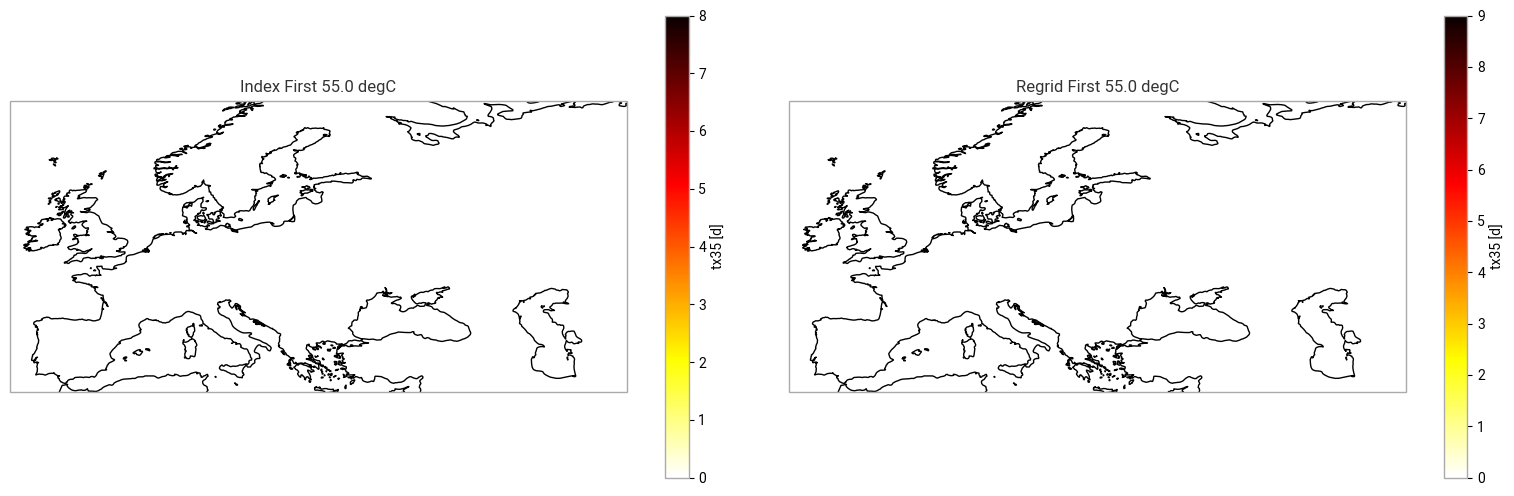

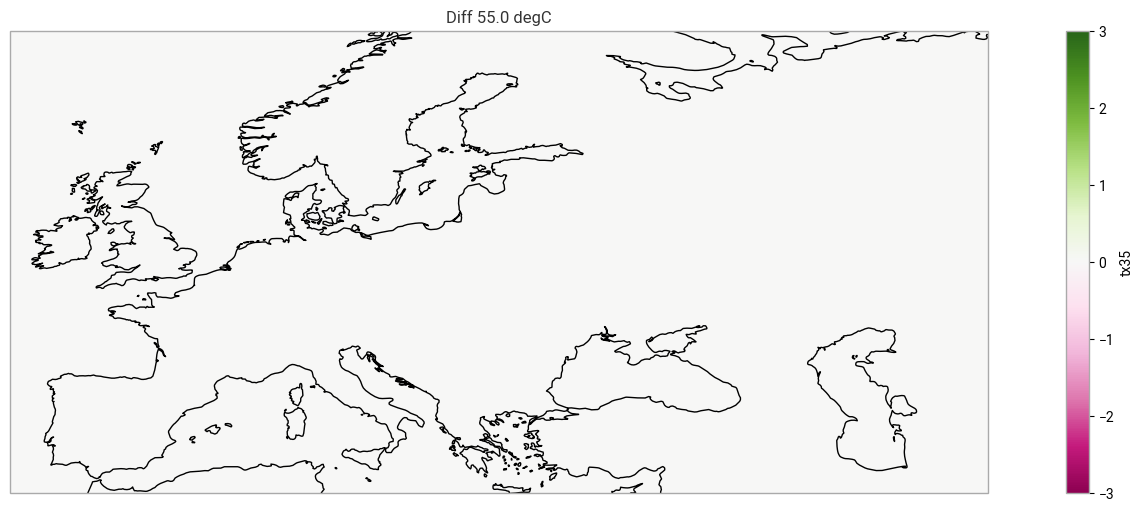

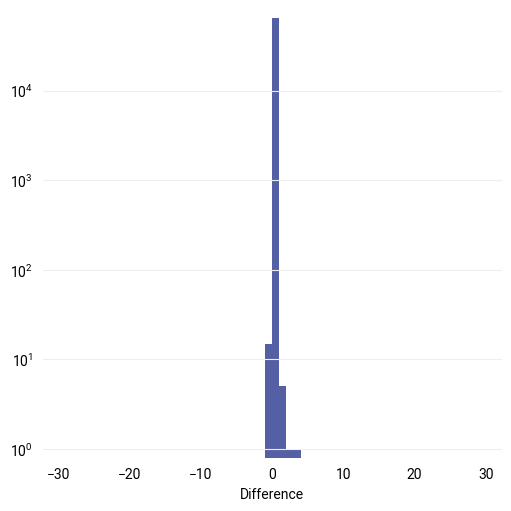

In [25]:
# plot different thresholds 

# define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_tx35 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "daily_maximum_near_surface_air_temperature",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "year": ["2080"],
    "format": "netcdf"
}

ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, request_CMIP6_tx35)

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6

# Homogenisation code 
project_id = "cmip6"
variable = 'tasmax'
var_mapping = {
            "dataset_variable": {"tasmax": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6
threshold = "55.0 degC"
month = 8

da_tx35 = xclim.indices.tx_days_above(data_CMIP6['tasmax'], thresh=threshold, 
                                      freq='MS', op='>')

# Convert DataArray to Dataset with specified variable name
ds_tx35 = da_tx35.to_dataset(name='tx35')


# Original Order Start 
# calculate index
da_tx35 = xclim.indices.tx_days_above(data_CMIP6['tasmax'], thresh=threshold, 
                                      freq='MS', op='>')

# Convert DataArray to Dataset with specified variable name
ds_tx35 = da_tx35.to_dataset(name='tx35')
# interpolate data
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'tx35'
}

INTER = xesmfCICA.Interpolator(int_attr)
ds_tx35_i = INTER(ds_tx35)
# Original Order End 

# New Order Start 
# Step 1: Wrap tasmax in a Dataset
new_tasmax_ds = xr.Dataset({'tasmax': data_CMIP6['tasmax']})

# Step 2: Set up interpolation attributes
new_int_attr = {
    'interpolation_method': 'conservative_normed',
    'lats': np.arange(-89.5, 90.5, 1),
    'lons': np.arange(-179.5, 180.5, 1),
    'var_name': 'tasmax'
}

new_INTER = xesmfCICA.Interpolator(new_int_attr)

# Step 3: Interpolate the tasmax dataset
new_tasmax_interp_ds = new_INTER(new_tasmax_ds)

# Step 4: Calculate tx35 index on interpolated tasmax
new_da_tx35 = xclim.indices.tx_days_above(new_tasmax_interp_ds['tasmax'], 
    thresh= threshold,
    freq='MS' # Monthly frequency
)

# # Step 5: Convert to Dataset
new_ds_tx35_i = new_da_tx35.to_dataset(name='tx35')
# New order end 


atlas = ds_tx35_i['tx35']  #DataArray
atlas_new = new_ds_tx35_i['tx35']

lat_bounds = (-90, 90)
lon_bounds = (-180, 180)

atlas_subset = atlas.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
new_atlas_subset = atlas_new.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Align time - maybe use xr.align
common_time = np.intersect1d(atlas_subset['time'], new_atlas_subset['time'])
atlas_subset = atlas_subset.sel(time=common_time)
new_atlas_subset = new_atlas_subset.sel(time=common_time)

atlas_flat = atlas_subset.values.flatten()
new_atlas_flat = new_atlas_subset.values.flatten()

# mask out NaNs
mask = ~np.isnan(atlas_flat) & ~np.isnan(new_atlas_flat) 
atlas_clean = atlas_flat[mask]
new_atlas_clean = new_atlas_flat[mask]


# Plot results ORIGINAL 

#zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
month = 8 

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# from atlas use tools
plot_month(ax[0], ds_tx35_i, 'tx35', month, f'Index First {threshold}', 'hot_r')
ax[0].set_extent(zoomin_extent)

# workflow (intermediate dataset)
plot_month(ax[1], new_ds_tx35_i, 'tx35', month, f'Regrid First {threshold}', 'hot_r')
ax[1].set_extent(zoomin_extent)
plt.subplots_adjust(wspace=0.01, hspace=0.1) 


diff = ds_tx35_i - new_ds_tx35_i
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
plot_month(ax, diff, 'tx35', month, f'Diff {threshold}', 'PiYG')

ax.set_extent(zoomin_extent)

plt.show()
plt.close()

# Histogram
fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
import numpy as np
ax.hist(diff.sel(time=f"2080-{month:02d}-01")["tx35"].values.ravel(), bins=np.arange(-31, 32, 1), log = True)
ax.set_xlabel("Difference")
plt.show()
plt.close()

Part 1: This will be an example case for the tx35 index:
- a case where the difference is zero
- a case where there is a difference
- explanation of each step
- explantation of the metrics

Part 2: 

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.

In [31]:
#PRECIPITATION 
#Index selected is rx1day: Monthly maximum of 1-day accumulated precipitation

# define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_rx1day = {
    "temporal_resolution": "monthly",
    "experiment": "ssp5_8_5",
    "variable": "precipitation",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "year": ["2070"],
    "format": "netcdf"
}

ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, request_CMIP6_rx1day)

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6

# Homogenisation code 
project_id = "cmip6"
variable = 'pr'
var_mapping = {
            "dataset_variable": {"pr": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6

month = 8

# calculate the index 
da_rx1day = xclim.indicators.atmos.max_n_day_precipitation_amount(data_CMIP6['pr'], window=1, freq='MS')

# Convert DataArray to Dataset with specified variable name
ds_rx1day = da_rx1day.to_dataset(name='rx1day')
ds_rx1day

# # Original Order Start 
# # calculate index
# da_tx35 = xclim.indices.tx_days_above(data_CMIP6['tasmax'], thresh=threshold, 
#                                       freq='MS', op='>')

# # Convert DataArray to Dataset with specified variable name
# ds_tx35 = da_tx35.to_dataset(name='tx35')
# # interpolate data
# int_attr = {'interpolation_method' : 'conservative_normed', 
#             'lats' : np.arange(-89.5, 90.5, 1),
#             'lons' : np.arange(-179.5, 180.5, 1),
#             'var_name' : 'tx35'
# }

# INTER = xesmfCICA.Interpolator(int_attr)
# ds_tx35_i = INTER(ds_tx35)
# # Original Order End 

# # New Order Start 
# # Step 1: Wrap tasmax in a Dataset
# new_tasmax_ds = xr.Dataset({'tasmax': data_CMIP6['tasmax']})

# # Step 2: Set up interpolation attributes
# new_int_attr = {
#     'interpolation_method': 'conservative_normed',
#     'lats': np.arange(-89.5, 90.5, 1),
#     'lons': np.arange(-179.5, 180.5, 1),
#     'var_name': 'tasmax'
# }

# new_INTER = xesmfCICA.Interpolator(new_int_attr)

# # Step 3: Interpolate the tasmax dataset
# new_tasmax_interp_ds = new_INTER(new_tasmax_ds)

# # Step 4: Calculate tx35 index on interpolated tasmax
# new_da_tx35 = xclim.indices.tx_days_above(new_tasmax_interp_ds['tasmax'], 
#     thresh= threshold,
#     freq='MS' # Monthly frequency
# )

# # # Step 5: Convert to Dataset
# new_ds_tx35_i = new_da_tx35.to_dataset(name='tx35')
# # New order end 


# atlas = ds_tx35_i['tx35']  #DataArray
# atlas_new = new_ds_tx35_i['tx35']

# lat_bounds = (-90, 90)
# lon_bounds = (-180, 180)

# atlas_subset = atlas.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
# new_atlas_subset = atlas_new.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# # Align time - maybe use xr.align
# common_time = np.intersect1d(atlas_subset['time'], new_atlas_subset['time'])
# atlas_subset = atlas_subset.sel(time=common_time)
# new_atlas_subset = new_atlas_subset.sel(time=common_time)

# atlas_flat = atlas_subset.values.flatten()
# new_atlas_flat = new_atlas_subset.values.flatten()

# # mask out NaNs
# mask = ~np.isnan(atlas_flat) & ~np.isnan(new_atlas_flat) 
# atlas_clean = atlas_flat[mask]
# new_atlas_clean = new_atlas_flat[mask]


# # Plot results ORIGINAL 

# #zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
# zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
# month = 8 

# proj = ccrs.PlateCarree()
# fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# # from atlas use tools
# plot_month(ax[0], ds_tx35_i, 'tx35', month, f'Index First {threshold}', 'hot_r')
# ax[0].set_extent(zoomin_extent)

# # workflow (intermediate dataset)
# plot_month(ax[1], new_ds_tx35_i, 'tx35', month, f'Regrid First {threshold}', 'hot_r')
# ax[1].set_extent(zoomin_extent)
# plt.subplots_adjust(wspace=0.01, hspace=0.1) 


# diff = ds_tx35_i - new_ds_tx35_i
# fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
# plot_month(ax, diff, 'tx35', month, f'Diff {threshold}', 'PiYG')

# ax.set_extent(zoomin_extent)

# plt.show()
# plt.close()

# # Histogram
# fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
# import numpy as np
# ax.hist(diff.sel(time=f"2080-{month:02d}-01")["tx35"].values.ravel(), bins=np.arange(-31, 32, 1), log = True)
# ax.set_xlabel("Difference")
# plt.show()
# plt.close()

2025-09-08 18:02:05,754 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/cds-df3e790cb8a4264a81dfc03311e78b7b79474ae72684fb6f90db3e257b55718f.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\n\x98\x00\x00\x03"\x08\x06\x00\x00\x00p\xd4R+\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddy' content_type=None
2025-09-08 18:02:05,798 — Homogenization-fixers — INFO — Dataset has already the correct names for its coordinates
2025-09-08 18:02:05,840 — UNITS_TRANSFORM — INFO — The dataset pr units are not in the correct magnitude. A conversion from kg m-2 s-1 to mm will be performed.
2025-09-08 18:02:05,916 — Homogenization-fixers — INFO — The dataset is in daily or monthly resolution, we don't need to resample it from hourly frequency


CMIP6 data type from earthkit-data: <class 'earthkit.data.readers.netcdf.NetCDFFieldListReader'>
CMIP6 data type in Xarray: <class 'xarray.core.dataset.Dataset'>


NameError: name 'pr' is not defined